In [85]:
import numpy as np
# for ploting
import matplotlib as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [86]:
# Assume input shape is (N, 2)
class Env:
    def __init__(self):
        self.func = lambda x : (x.T[0]**2 + x.T[1]**2).T

    def getValue(self, x):
        return self.func(x)
    
    def getGradient(self, x):
        delta = 0.0001
        gradient = np.zeros(x.shape)
        gradient[:,0] = (self.getValue(x + [delta, 0]) - self.getValue(x - [delta, 0])) / (delta * 2)
        gradient[:,1] = (self.getValue(x + [0, delta]) - self.getValue(x - [0, delta])) / (delta * 2)
        return gradient

In [87]:
def plotCurve(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.01, 50.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
def plotLine(X, Y, Z):
    plt.contourf(X,Y,Z)
    plt.contour(X,Y,Z)
    plt.show()

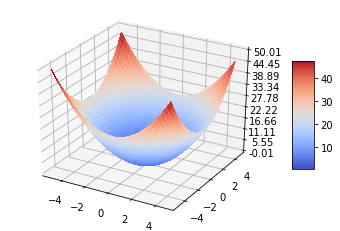

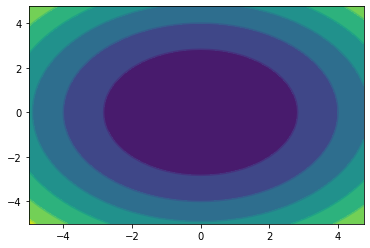

In [88]:
env = Env()
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = env.getValue(np.array([X, Y]).T)

plotCurve(X, Y, Z)
plotLine(X, Y, Z)